#####Imports:

In [2]:
# Import everything necessary:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.preprocessing.text import Tokenizer                   
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import SGD
from keras import layers
import pandas as pd
import numpy as np
import glob
import cv2 
import os
import datetime
import random
import seaborn as sns
import nltk 
nltk.download('words')
import regex as re
import collections 
import random
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.stem import *
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('punkt')

import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from tensorflow.keras.layers import Dense, Embedding,GlobalMaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate


!pip install dabl
import dabl
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits


from google.colab import drive

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from numpy.random import seed
seed(1)

# Predicting Youtube Video Trend Time
## Convolutional Neural Net + Multilayer Perceptron Model
### Evan Phillips, Jaypal Bhatia, and Noor Gill

In [4]:
# For faster data loading: 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read in datasets from countries that are predominantly English-speaking (United States, Great Britian, and Canada): 
CA_data = pd.read_csv('/content/drive/MyDrive/266 Final Project/Data/CA_youtube_trending_data.csv')
GB_data = pd.read_csv('/content/drive/MyDrive/266 Final Project/Data/GB_youtube_trending_data.csv')
US_data = pd.read_csv('/content/drive/MyDrive/266 Final Project/Data/US_youtube_trending_data.csv')

In [6]:
# Concatenate all videos into a single df: 
df = pd.concat([CA_data, GB_data, US_data])
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


## Data Cleaning and Pre-processing:

In [7]:
# Convert or ensure that the publish and trending date are in datetime format:
df['trending_date']= pd.to_datetime(df['trending_date'])
df['publishedAt']= pd.to_datetime(df['publishedAt'])
# Rename the publish date column for uniformity:
df = df.rename(columns={'publishedAt': 'publish_date'})
# Sanity check here to ensure publish date is before trending date: 
df = df[df['publish_date'] < df['trending_date']]
# Generate a new column with the difference between the time the video was published and when it was trending
# consider renaming column to "hours_til_trending"
df['time_difference'] = (df['trending_date'] - df['publish_date']).dt.total_seconds()/60/60
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,video_id,title,publish_date,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_difference
0,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12 00:00:00+00:00,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,16.499444
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,7.431667
2,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",6.997222
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,4.662778
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,8.831944


In [8]:
# Determine where the null values are (do not need to be handled because the description attribute will not be employed):
df.isnull().sum()

video_id                0
title                   0
publish_date            0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          9409
time_difference         0
dtype: int64

In [9]:
# Split the tags by the '|' character:
df['tags'] =df['tags'].str.split('|')

In [10]:
# Remove non-English words from tags:
words = set(nltk.corpus.words.words())

def valid_tags_only(column):
  values = []
  for i in df[column]:
    i = [" ".join(w for w in nltk.wordpunct_tokenize(x) if w.lower() in words or not w.isalpha()) for x in i]
    values.append(i)
  df[column] = values

valid_tags_only('tags')

In [11]:
# Remove non-English words from titles: 
def valid_words_only(column):
  values = []
  for i in df[column]:
    i = re.sub('[^a-zA-Z0-9 ]', " ", i)
    values.append(i)
  df[column] = values

valid_words_only('title')

In [12]:
# Validate the dates:
df = df[df['publish_date'].notna()]
df = df[df['trending_date'].notna()]

# Sanity check here to ensure publish date is before trending date: 
df = df[df['publish_date'] < df['trending_date']]

In [13]:
# Create a new column for the quarter, representing the season of the publish date: 
df['quarter'] = df['publish_date'].dt.quarter

In [14]:
# Eliminate duplicate video ids just in case:
df = df.drop_duplicates(subset=['video_id'])

# Ensure that the tags are valid and non-null:
valid_tags = [x for x in df['tags'] if x]
df = df.loc[df['tags'].isin(valid_tags)]

# Lowercase tags:
df['tags'] = df['tags'].apply(lambda x: [i.lower() for i in x])
# Remove numbers from tags:
df['tags'] = df['tags'].replace(to_replace=r'\d+', value='', regex = True)
# Remove emojis from tags:
emoji_re = emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
                           "]+", flags=re.UNICODE)
df['tags'] = df['tags'].apply(lambda x: [emoji_re.sub(r'', i) for i in x])
# Remove punctuation from tags: 
df['tags'] = df['tags'].apply(lambda x: [re.sub(r'[^\w\s]', '', i) for i in x])

In [15]:
# Take out empty strings and  rows with no tags:
df['tags'] = df['tags'].apply(lambda x: [i for i in x if i])
valid_tags = [x for x in df['tags'] if x]
valid_tags =  [x for x in valid_tags if x != 'none']
df = df.loc[df['tags'].isin(valid_tags)]

In [16]:
# Create a category column that maps the number in the categoryId column to the actual category string: 
df['category'] = df['categoryId'].map({0: 'Film & Animation',
                                        1 : 'Autos & Vehicles', 
                                        2 : 'Music',
                                        3: 'Pets & Animals',
                                        4: 'Sports',
                                        5: 'Short Movies',
                                        6: 'Travel & Events',
                                        7: 'Gaming',
                                        8: 'Videoblogging',
                                        9: 'People & Blogs',
                                        10: 'Comedy',
                                        11: 'Entertainment',
                                        12: 'News & Politics',
                                        13: 'Howto & Style',
                                        14: 'Education', 
                                        15: 'Science & Technology',
                                        16: 'Movies (CA & GB) or Nonprofits & Activism (US)',
                                        17: 'Anime/Animation (CA & GB) or Movies (US)',
                                        18: 'Action/Adventure (CA & GB) or Anime/Animation (US)',
                                        19: 'Classics (CA & GB) or Action/Adventure (US)',
                                        20: 'Comedy (CA & GB) or Classics (US)',
                                        21: 'Documentary (CA & GB) or Comedy (US)',
                                        22: 'Drama (CA & GB) or Documentary (US)', 
                                        23: 'Family (CA & GB) or Drama (US)', 
                                        24: 'Foreign (CA & GB) or Family (US)',
                                        25: 'Horror (CA & GB) or Foreign (US)',
                                        26: 'Sci-Fi/Fantasy (CA & GB) or Horror (US)', 
                                        27: 'Thriller (CA & GB) or Sci-Fi/Fantasy (US)',
                                        28: 'Shorts (CA & GB) or Thriller (US)',
                                        29: 'Shows (CA & GB) or Shorts (US)',
                                        30: 'Trailers (CA & GB) or Shows (US)',
                                        31: 'Trailers'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
# Assign the final tag (one per video entry) to the most repeated one or a randomly selected one of there is no repetition: 
final_tags = []
for item in df['tags']:
  duplicate = [item for item, count in collections.Counter(item).items() if count > 1]
  duplicate = sorted(duplicate, reverse=True)
  if len(duplicate) > 0:
    final_tags.append(duplicate[0])
  elif len(duplicate) == 0:
    #print(item)
    final_tags.append(random.choice(item))

df['final_tag'] = final_tags

In [18]:
# One-hot encode the comments disabled and ratings disabled columns in case they are to be binarized and used in the model: '
# We don't need to map True to 1 and False to 0, they're identical and already "truthy"
df['comments_disabled'] = df['comments_disabled'].map({True:1, False:0})
df['ratings_disabled'] = df['ratings_disabled'].map({True:1, False:0})

In [19]:
# Change the publish date to a continuous variable for input into the model:
#dates = []
#for date in df['publish_date']:
  #dates.append(int(date .strftime("%Y%m%d%H%M%S")))
#df['publish_date'] = dates
df['publish_date'] = pd.to_datetime(df['publish_date']).astype(int)/ 10**9
# This calculates the number of seconds since 1970 january 1 midnight (unix time) and is a much more continuous metric than prior metric

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: casting datetime64[ns, UTC] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [20]:
# Check the number of unique tags present: 
df.final_tag.nunique()

9737

In [21]:
# Review the revised df:
df.head()

,video_id,title,publish_date,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,time_difference,quarter,category,final_tag
0,KX06ksuS6Xo,Diljit Dosanjh CLASH Official Music Video ...,1.597131e+09,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12 00:00:00+00:00,"[clash, goat album, new album, 2020, new song,...",9140911,296541,6180,30059,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,0,0,CLASH official music video performed by DILJIT...,16.499444,3,Comedy,the music
1,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,1.597164e+09,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,"[funny, funny, community, community, community...",2038853,353797,2628,40222,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,0,0,I left youtube for a month and this is what ha...,7.431667,3,Foreign (CA & GB) or Family (US),funny
2,M9Pmf9AB4Mo,Apex Legends Stories from the Outlands Th...,1.597165e+09,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,"[apex, apex, new apex legend, apex rampart, ap...",2381688,146740,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,0,0,"While running her own modding shop, Ramya Pare...",6.997222,3,Comedy (CA & GB) or Classics (US),apex
3,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND,1.597174e+09,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,"[prank, basketball, ghost, funny, i8, faze rug...",1514614,156914,5857,35331,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,0,0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,4.662778,3,Drama (CA & GB) or Documentary (US),funny
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,1.597159e+09,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,"[the family, interior design, movie theater, h...",1123889,45803,964,2198,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,0,0,Transforming The LaBrant Family's empty white ...,8.831944,3,Sci-Fi/Fantasy (CA & GB) or Horror (US),movie theater


### Prompting the user to enter data needed at prediction time:

# Implementing the Supervised Model 

In [22]:
# Validation:
df.shape

(36939, 20)

In [23]:
# Retrieve input dataframe for CNN: 
def create_input_df(title):
  """Create input data frame with variables that will be implemented into the CNN"""
  new_title_category = predict_category(title)
  # Getting only the ones from df_categories table w the same category:
  category_df = df_categories_probs[df_categories_probs['category'] == new_title_category]
  input_df = df[df['title'].isin(category_df['title'])]
  # Getting only the ones who trended fast (minimizing trend time):
  input_df = input_df[input_df['time_difference'] <= 200]
  return input_df

# Process attribites for CNN:
def process_attributes(df, train, test, continuous_cols, categorical_cols):
  """Initializes the column names of the continuous data and performs min-max scaling"""
  # Initialize the column names of the continuous data and do min-max scaling each continuous feature column to the range [0, 1]
  cs = MinMaxScaler()
  trainContinuous = cs.fit_transform(train[continuous_cols])
  testContinuous = cs.transform(test[continuous_cols])
  # One-hot encode the zip code categorical data 
  # One-hot encode, all output features are now in the range [0, 1]
  zipBinarizer = LabelBinarizer().fit(df[categorical_cols[0]])
  zipBinarizer_1 = LabelBinarizer().fit(df[categorical_cols[1]])
  # zipBinarizer_2 =  LabelBinarizer().fit(df[categorical[2]])
  trainCategorical = zipBinarizer.transform(train[categorical_cols[0]])
  trainCategorical_1 = zipBinarizer_1.transform(train[categorical_cols[1]])
  # trainCategorical_2 = zipBinarizer_2.transform(train[categorical[2]])
  testCategorical = zipBinarizer.transform(test[categorical_cols[0]])
  testCategorical_1 = zipBinarizer_1.transform(test[categorical_cols[1]])
  # testCategorical_2 = zipBinarizer_2.transform(test[categorical[2]])
  # Construct our training and testing data points by concatenating the categorical features with the continuous features
  trainX = np.hstack([trainCategorical, trainCategorical_1, trainContinuous])
  testX = np.hstack([testCategorical, testCategorical_1, testContinuous])
  # Return the concatenated training and testing data
  return (trainX, testX)


# Split the dataframe into train and test sets
X = df[['title', 'likes', 'dislikes', 'comment_count', 'category', 'quarter', 'publish_date', 'view_count', 'comments_disabled', 'ratings_disabled']]
y = df['time_difference']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Use the process_attributes function to initialize training set to predict view_count 
processed_train, processed_test = process_attributes(df, X_train, X_test, ['likes', 'view_count', 'comment_count', 'dislikes'], 
                                                     ['category', 'quarter', 'comments_disabled', 'ratings_disabled'])

# Split titles and descriptions to train and test 
titles_train = X_train['title']
titles_test = X_test['title']

# Fit Tokenizers on title and description
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(titles_train)

# Tokenize titles 
X_train_titles = tokenizer.texts_to_sequences(titles_train)
X_test_titles = tokenizer.texts_to_sequences(titles_test)

# Add 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1          

# Set maxlen to dimensions of the embeddings
embedding_dim = 100

# Pad sequences to account for descriptions and titles of different lengths 
X_train_titles = pad_sequences(X_train_titles, padding='post', maxlen=embedding_dim)
X_test_titles = pad_sequences(X_test_titles, padding='post', maxlen=embedding_dim)

In [24]:
# Validation: 
processed_test.shape

(7388, 23)

In [25]:
# For reference: 
tokenizer.index_word

{1: 'the',
 2: 'to',
 3: 's',
 4: 'in',
 5: 'a',
 6: 'official',
 7: 'i',
 8: 'video',
 9: 'highlights',
 10: 'of',
 11: 'vs',
 12: 'on',
 13: '1',
 14: '2',
 15: 'and',
 16: 'with',
 17: 'my',
 18: '2021',
 19: 'shorts',
 20: 'for',
 21: 'you',
 22: 'is',
 23: 'minecraft',
 24: 'new',
 25: '2020',
 26: '3',
 27: 'at',
 28: 'music',
 29: 'trailer',
 30: 'game',
 31: 'first',
 32: '0',
 33: 'this',
 34: 'it',
 35: 'man',
 36: 't',
 37: 'ft',
 38: 'league',
 39: 'how',
 40: 'live',
 41: 'we',
 42: 'from',
 43: 'what',
 44: '4',
 45: 'me',
 46: '5',
 47: 'v',
 48: 'day',
 49: 'world',
 50: 'full',
 51: 'm',
 52: 'x',
 53: 'as',
 54: 'but',
 55: 'de',
 56: 'season',
 57: 'us',
 58: 'after',
 59: 'united',
 60: 'can',
 61: 'out',
 62: 'by',
 63: '10',
 64: 'up',
 65: 'your',
 66: 'news',
 67: '000',
 68: 'all',
 69: 'that',
 70: 'fortnite',
 71: 'best',
 72: 'why',
 73: 'feat',
 74: 'life',
 75: 'are',
 76: 'city',
 77: 'episode',
 78: 'our',
 79: 'challenge',
 80: '21',
 81: 'reaction',
 8

In [26]:
# For reference: 
y_test

97843    29.660833
16004     0.620278
54352    15.237500
96848    15.995556
44225    21.499722
           ...    
93761     7.996944
1601      3.268056
91355     7.497778
10220    10.986667
70345     6.375000
Name: time_difference, Length: 7388, dtype: float64

# Creating the Tokenized CNN of the Title 

In [27]:
# Download word embeddings 
!wget --no-check-certificate \
http://nlp.stanford.edu/data/glove.6B.zip \
-O /tmp/glove.6B.zip

--2022-04-10 04:15:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-10 04:15:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-10 04:15:11--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [28]:
# Put all embeddings in a file called tmp
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [29]:
# Append all the word embeddings to a dictionary
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [30]:
# Create embedding matrix for title CNN
word_index = tokenizer.index_word
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for i, word in word_index.items():
    embedding_vector = embeddings_index.get(word)
    #print(embedding_vector)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [31]:
# Create an embedding layer with the keras embedding_matrix
embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=embedding_dim,
                            weights=[embedding_matrix],
                            input_length=embedding_dim,
                            trainable=False)

In [32]:
# Create a CNN for titles
def create_cnn():
  '''Creates a CNN with a Sequential Model'''
  model = Sequential([
      embedding_layer,
    Conv1D(100, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(50, activation='relu'),
    Dense(20, activation = 'relu'),
    Dense(1,)
  ])
  # Choose parameters and prepare model for training
  opt = 'adam'
  model.compile(loss='mean_squared_error',optimizer= opt,metrics=['mse'])
  # Fit the model to the training set 
  history = model.fit(X_train_titles, y_train, epochs=4, validation_data=(X_test_titles, y_test))
  return (model, history)


model, history = create_cnn()

Epoch 1/4
924/924 [==============================] - 15s 5ms/step - loss: 1866.0491 - mse: 1866.0491 - val_loss: 1876.7957 - val_mse: 1876.7957
Epoch 2/4
924/924 [==============================] - 4s 4ms/step - loss: 1770.0295 - mse: 1770.0295 - val_loss: 1809.2261 - val_mse: 1809.2261
Epoch 3/4
924/924 [==============================] - 4s 4ms/step - loss: 1708.8734 - mse: 1708.8734 - val_loss: 1830.1135 - val_mse: 1830.1135
Epoch 4/4
924/924 [==============================] - 4s 4ms/step - loss: 1620.2874 - mse: 1620.2874 - val_loss: 1919.6841 - val_mse: 1919.6841


In [33]:
# # Use scikit-learn to grid search the batch size and epochs
# import numpy
# from sklearn.model_selection import GridSearchCV
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# # Function to create model, required for KerasClassifier

# # define the grid search parameters
# model = KerasClassifier(build_fn=create_cnn, epochs=10, batch_size=4, verbose=0)
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=optimizer)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train_titles, y_train)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


# Creating MLP framework 

In [34]:
y_test
def create_mlp(dim, regress=False):
	'''Create an MLP with a Sequential Model'''
	# Define our MLP network
	model = Sequential()
	model.add(Dense(23, input_dim=dim, activation="relu"))
	model.add(Dense(23, activation="relu"))
	# Check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))
	# Return our model
	return model

# Build our final Keras model capable of handling both multiple inputs and mixed data

*This is where the branches come together and ultimately where the “magic” happens. Training will also happen in this script.*

In [35]:
# Create the MLP and CNN models
mlp = create_mlp(processed_train.shape[1], regress=False)
cnn = create_cnn()[0]
# Create the input to our final set of layers as the output of both the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output], axis = -1)
# The last FC layer has two dense layers such that the final is the regression head
multimodal_model = Dense(20, activation="relu")(combinedInput)
multimodal_model = Dense(1, activation="linear")(multimodal_model)
# The model accepts categorical/numerical data on the MLP input and titles on the CNN input, yielding the time to trend estimation
model = Model(inputs=[mlp.input, cnn.input], outputs=multimodal_model)

Epoch 1/4
924/924 [==============================] - 5s 5ms/step - loss: 1859.6121 - mse: 1859.6121 - val_loss: 1818.7583 - val_mse: 1818.7583
Epoch 2/4
924/924 [==============================] - 4s 4ms/step - loss: 1769.2206 - mse: 1769.2206 - val_loss: 1815.1788 - val_mse: 1815.1788
Epoch 3/4
924/924 [==============================] - 4s 4ms/step - loss: 1714.1241 - mse: 1714.1241 - val_loss: 1821.7006 - val_mse: 1821.7006
Epoch 4/4
924/924 [==============================] - 4s 4ms/step - loss: 1626.6432 - mse: 1626.6432 - val_loss: 1881.6481 - val_mse: 1881.6481


In [36]:
# Compile the model using mean absolute percentage error as the loss since we want to minimize this difference between our predicted time to trends and the actual ones
opt = 'adam'
model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics = ['mse', 'mape'])
# Train the model
print("Training model...")
history =model.fit(
	x=[processed_train, X_train_titles], y=y_train,
	validation_data=([processed_test, X_test_titles], y_test),
	epochs=20, batch_size=8)
# Make predictions on the test data
preds = model.predict([processed_test, X_test_titles])
#model.summary()

Training model...
Epoch 1/20
3694/3694 [==============================] - 20s 5ms/step - loss: 98.4581 - mse: 2397.1953 - mape: 98.4581 - val_loss: 84.2963 - val_mse: 2631.7781 - val_mape: 84.2963
Epoch 2/20
3694/3694 [==============================] - 19s 5ms/step - loss: 92.7558 - mse: 2452.6321 - mape: 92.7558 - val_loss: 71.5656 - val_mse: 2476.6626 - val_mape: 71.5656
Epoch 3/20
3694/3694 [==============================] - 19s 5ms/step - loss: 86.3610 - mse: 2423.0354 - mape: 86.3610 - val_loss: 71.1100 - val_mse: 2436.3479 - val_mape: 71.1100
Epoch 4/20
3694/3694 [==============================] - 19s 5ms/step - loss: 82.7379 - mse: 2412.7161 - mape: 82.7379 - val_loss: 71.8523 - val_mse: 2402.8979 - val_mape: 71.8523
Epoch 5/20
3694/3694 [==============================] - 19s 5ms/step - loss: 77.1771 - mse: 2370.1814 - mape: 77.1771 - val_loss: 71.7136 - val_mse: 2391.3528 - val_mape: 71.7136
Epoch 6/20
3694/3694 [==============================] - 19s 5ms/step - loss: 72.4617 - 

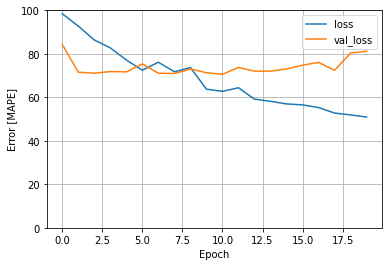

In [37]:
# Analyze test loss vs. val loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MAPE]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [38]:
# When predicting output of trend time, we scale continuous values and categories 
# Input in this order: ['title', 'likes', 'dislikes', 'comment_count', 'category', 'quarter', 'publish_date', 'view_count', 'comments_disabled', 'ratings_disabled']
quick_trend = ['Hilarious Jokes', 109328, 6, 38548, 'Comedy', 3, '2019-10-25', 12123974, 0, 0]
slow_trend = ['How to use Microsoft Word', 0, 44, 0, 'Science & Technology', 1, '2020-01-30', 123, 1, 1]

def preprocess_unseen(video_stats):
  '''Used for making new predictions given a set of video information in list format'''
  embedding_dim = 100
  unseen = pd.DataFrame([video_stats], columns = X_train.columns)
  unseen['publish_date'] = pd.to_datetime(unseen['publish_date']).astype(int)/ 10**9
  processed_train, processed_unseen = process_attributes(df, X_train, unseen, ['likes', 'view_count', 'comment_count', 'dislikes'], 
                                                     ['category', 'quarter', 'comments_disabled', 'ratings_disabled'])
  unseen_tokens = tokenizer.texts_to_sequences(unseen['title'])
  unseen_tokens = pad_sequences(unseen_tokens, padding='post', maxlen=embedding_dim)

  return [processed_unseen, unseen_tokens]

#preprocess_unseen(quick_trend)[1].shape
quick_pred = model.predict(preprocess_unseen(quick_trend))[0,0]
slow_pred  = model.predict(preprocess_unseen(slow_trend))[0,0]
print(f'quick_pred: {quick_pred} \n slow_pred: {slow_pred}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  # Remove the CWD from sys.path while we load stuff.


quick_pred: 4.435945987701416 
 slow_pred: 3.9770870208740234


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  # Remove the CWD from sys.path while we load stuff.


## Baseline Model

In [39]:
# Continuous Variables for Baseline: 
base_views = np.mean(X_train.view_count)
base_likes = np.mean(X_train.likes)
base_dislikes = np.mean(X_train.dislikes)
base_comments = np.mean(X_train.comment_count)
base_publish_date = np.mean(X_train.publish_date)

In [40]:
# Categorical Variables for Baseline: 
base_title = X_train.category.value_counts().index.tolist()[0]
base_category = X_train.category.value_counts().index.tolist()[0]
base_comments_disabled = X_train.comments_disabled.value_counts().index.tolist()[0]
base_ratings_disabled = X_train.ratings_disabled.value_counts().index.tolist()[0]
base_quarter = X_train.quarter.value_counts().index.tolist()[0]

In [41]:
# Getting an intuitive baseline model for mode-based attributes: 
base_info = [base_title, base_likes, base_dislikes, base_comments, base_category, base_quarter, base_publish_date, base_views, base_ratings_disabled, base_comments_disabled] 

base_trend_hours = model.predict(preprocess_unseen(base_info))[0, 0]
base_trend_days = base_trend_hours/24 

print('\033[1m' + "Your video is expected to trend in " + str(np.round(base_trend_hours, 1)) + " hours (" + str(np.round(base_trend_days, 1)) + " days)." + '\033[0m')


Your video is expected to trend in 9.6 hours (0.4 days).


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  # Remove the CWD from sys.path while we load stuff.


In [46]:
# Creating a baseline model testing various regressors and classifiers to determine accuracy for comparison with NN: 
df_copy = df.reset_index()
X = df_copy[['title', 'likes', 'dislikes', 'comment_count', 'category', 'quarter', 'publish_date', 'view_count', 'comments_disabled', 'ratings_disabled']]
y = [int(i) for i in df_copy['time_difference']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

baseline = dabl.SimpleClassifier().fit(X_train, y_train)

print("Accuracy Score: ", baseline.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


Running DummyClassifier()
accuracy: 0.062 recall_macro: 0.004 precision_macro: 0.000 f1_macro: 0.000
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.062 recall_macro: 0.004 precision_macro: 0.000 f1_macro: 0.000

Running GaussianNB()
accuracy: 0.000 recall_macro: 0.004 precision_macro: 0.000 f1_macro: 0.000
=== new best GaussianNB() (using recall_macro):
accuracy: 0.000 recall_macro: 0.004 precision_macro: 0.000 f1_macro: 0.000

Running MultinomialNB()
accuracy: 0.076 recall_macro: 0.009 precision_macro: 0.005 f1_macro: 0.004
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.076 recall_macro: 0.009 precision_macro: 0.005 f1_macro: 0.004

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.049 recall_macro: 0.004 precision_macro: 0.000 f1_macro: 0.000
Running DecisionTreeClassifier(class_weight='balanced', max_depth=397)
accuracy: 0.054 recall_macro: 0.012 precision_macro: 0.013 f1_macro: 0.012
=== new best DecisionTreeClassifie

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


KeyboardInterrupt: ignored

## User-friendly Demo

In [48]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

# Create helper function for prediction of single new video entry: 
def trend_time_predict():
  # Prompting the user to enter data needed at prediction time:
  user_title = str(input('Enter video title: '))
  user_likes = int(input('Enter like count: '))
  user_dislikes = int(input('Enter dislike count: '))
  user_comment_count = int(input('Enter comment count: '))
  user_category = str(input("""Choose a category from the following:
      Comedy \n
      Foreign (CA & GB) or Family (US) \n
      Comedy (CA & GB) or Classics (US) \n
      Drama (CA & GB) or Documentary (US) \n
      Sci-Fi/Fantasy (CA & GB) or Horror (US) \n
      Thriller (CA & GB) or Sci-Fi/Fantasy (US) \n
      Anime/Animation (CA & GB) or Movies (US) \n
      Music \n
      Horror (CA & GB) or Foreign (US) \n
      Shorts (CA & GB) or Thriller (US) \n
      Autos & Vehicles \n
      Family (CA & GB) or Drama (US) \n
      Classics (CA & GB) or Action/Adventure (US) \n
      Science & Technology \n
      Shows (CA & GB) or Shorts (US) \n"""))
  user_publish_date = str(input('Enter the publish date in the format YYYY-MM-DD: '))
  user_publish_date =  pd.to_datetime(user_publish_date)
  
  user_quarter = user_publish_date.quarter

  user_view_count = int(input('Enter view count: '))
  user_ratings_enabled = int(input('Are ratings enabled? (Enter 0 if yes and 1 if no): '))
  user_comments_enabled = int(input('Are comments enabled? (Enter 0 if yes and 1 if no): '))

  user_past = int(input('How many days has it been since you uploaded this video?: '))*24

  user_info = [user_title, user_likes, user_dislikes, user_comment_count, user_category, user_quarter, user_publish_date, user_view_count, user_ratings_enabled, user_comments_enabled] 

  trend_hours = model.predict(preprocess_unseen(user_info))[0,0] - user_past
  trend_days = trend_hours/24
  return print('\033[1m' + "Your video is expected to trend in " + str(np.round(trend_hours, 1)) + " hours (" + str(np.round(trend_days, 1)) + " days)." + '\033[0m')

trend_time_predict()

Enter video title: Children of Dune by Frank Herbert
Enter like count: 16
Enter dislike count: 0
Enter comment count: 8
Choose a category from the following:
      Comedy 

      Foreign (CA & GB) or Family (US) 

      Comedy (CA & GB) or Classics (US) 

      Drama (CA & GB) or Documentary (US) 

      Sci-Fi/Fantasy (CA & GB) or Horror (US) 

      Thriller (CA & GB) or Sci-Fi/Fantasy (US) 

      Anime/Animation (CA & GB) or Movies (US) 

      Music 

      Horror (CA & GB) or Foreign (US) 

      Shorts (CA & GB) or Thriller (US) 

      Autos & Vehicles 

      Family (CA & GB) or Drama (US) 

      Classics (CA & GB) or Action/Adventure (US) 

      Science & Technology 

      Shows (CA & GB) or Shorts (US) 
Science & Technology
Enter the publish date in the format YYYY-MM-DD: 2022-04-09
Enter view count: 26
Are ratings enabled? (Enter 0 if yes and 1 if no): 0
Are comments enabled? (Enter 0 if yes and 1 if no): 0
How many days has it been since you uploaded this video?: 0
Your